<a href="https://colab.research.google.com/github/Nerflix/Markov_Chain_Processes1/blob/main/Markov_Jump_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, gamma
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [4]:
from google.colab import files

# Upload the CSV file to Colab
uploaded = files.upload()

# Read the CSV file
df = pd.read_excel('Fire.xlsx')

# Display the DataFrame
df

Saving Fire.xlsx to Fire (2).xlsx


,Row Labels,Chimney Fires,Due to apparatus,Dwellings,Good intent,Malicious,Non-fire false alarms,Non-fire incidents,Other Buildings,Other Outdoors,Road Vehicles,Secondary Fires
0,Avon,901,46300,7085,16762,2504,3028,36926,4010,1407,7097,18606
1,Bedfordshire,515,20197,5050,9013,1533,1289,19973,2550,1472,3944,12569
2,Berkshire,819,25722,5006,15107,1337,1606,24283,2701,454,3727,11938
3,Buckinghamshire,1020,26507,4912,10456,1366,1398,28464,3077,1509,3912,13333
4,Cambridgeshire,803,30674,3745,18089,1110,586,17530,2959,1086,4431,13333
5,Cheshire,1143,29534,5561,14505,1259,1507,23492,3157,977,4328,21540
6,Cleveland,201,15620,2970,22992,1548,1113,21900,2028,741,3744,41961
7,Cornwall,2077,14320,3630,8906,631,1494,24366,2116,989,2799,6887
8,Cumbria,1800,15357,3459,6436,645,881,12207,2018,806,2497,9312
9,Derbyshire,1320,24777,6119,11338,1094,705,22381,3454,1456,4771,16611


In [5]:
# Extract the required columns from the dataframe
claim_frequencies = df.loc[:, 'Chimney Fires':'Secondary Fires'].values
claim_severities = df.loc[:, 'Chimney Fires':'Secondary Fires'].values

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_claim_frequencies = scaler.fit_transform(claim_frequencies)
scaled_claim_severities = scaler.fit_transform(claim_severities)




In [6]:
# Fit the Poisson distribution to claim frequencies
poisson_model = poisson(np.mean(scaled_claim_frequencies, axis=0))

# Fit the Gamma distribution to claim severities (column-wise)
gamma_models = []
for column in scaled_claim_severities.T:
    gamma_shape, gamma_loc, gamma_scale = gamma.fit(column)
    gamma_models.append(gamma(gamma_shape, gamma_loc, gamma_scale))
gamma_parameters = []
for column in scaled_claim_severities.T:
    gamma_shape, gamma_loc, gamma_scale = gamma.fit(column)
    gamma_parameters.append((gamma_shape, gamma_loc, gamma_scale))
gamma_parameters

[(2.648421631478941, -1.5031070850941182, 0.567548422310467),
 (0.15188749448523026, -0.6095751947437369, 1.3446708702183003),
 (0.23965958251597225, -0.8014866017540603, 1.2008881129197877),
 (0.28472350053369505, -1.028722337646502, 1.188129229766353),
 (0.38156976969721035, -0.7827762001134919, 1.1966097927656292),
 (0.2106185641307725, -0.649793704700319, 1.176099507039655),
 (0.15749230902208178, -0.6912026446965971, 1.269895609601838),
 (0.28062298092276317, -1.021825078277654, 1.1784300313027973),
 (3.9167615998963026, -1.715493080412693, 0.4379863212572505),
 (2.8404072982459305, -1.4587173304679344, 0.5135592915755658),
 (1.363738889193808, -1.0110506835747062, 0.7413870887320528)]

In [7]:
from scipy.stats import poisson, chi2
from scipy.stats import chisquare
from statsmodels.discrete.discrete_model import NegativeBinomial


# Perform goodness-of-fit test for the Poisson distribution
observed_frequencies = np.sum(scaled_claim_frequencies, axis=0)
expected_frequencies = poisson_model.pmf(np.arange(len(observed_frequencies)))
chi2_statistic, p_value = chisquare(observed_frequencies, expected_frequencies)

# Check if Poisson assumption is violated (p-value below a chosen significance level)
if p_value < 0.05:
    # Data does not follow a Poisson distribution, consider alternative models
    negative_binomial_model = NegativeBinomial(observed_frequencies, np.ones_like(observed_frequencies))
    negative_binomial_results = negative_binomial_model.fit()
    # Use negative_binomial_results for further analysis
else:
    # Data follows a Poisson distribution, continue with the Poisson model
    print("You can use poisson_model for further analysis")
    pass


You can use poisson_model for further analysis


In [8]:
# Calculate the expected claim frequencies
expected_claim_frequencies = poisson_model.mean()
expected_claim_frequencies[np.isnan(expected_claim_frequencies)] = 0.0

expected_claim_frequencies


array([0.00000000e+00, 0.00000000e+00, 3.53252781e-17, 6.56040878e-17,
       2.52323415e-17, 0.00000000e+00, 1.23007665e-17, 0.00000000e+00,
       0.00000000e+00, 2.52323415e-17, 0.00000000e+00])

In [9]:
# Define a function to predict claim costs based on claim frequencies
def predict_claim_costs(claim_frequencies):
    predicted_claim_severities = regression_model.predict(claim_frequencies.reshape(-1, 1))
    predicted_claim_severities = predicted_claim_severities.reshape(1, -1)  # Reshape to 2D
    predicted_claim_costs = scaler.inverse_transform(predicted_claim_severities)
    return predicted_claim_costs

# Fit a linear regression model to estimate claim severities
regression_model = LinearRegression()
valid_mask = np.isfinite(scaled_claim_severities.mean(axis=0))
regression_model.fit(expected_claim_frequencies.reshape(-1, 1), scaled_claim_severities.mean(axis=0)[valid_mask])

# Example usage:
claim_frequencies_new = np.array([[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]])
predicted_claim_costs_new = predict_claim_costs(scaler.transform(claim_frequencies_new))


In [10]:
# Predicting Claim Costs
expected_claim_costs = regression_model.predict(expected_claim_frequencies.reshape(-1, 1))
predicted_claim_costs = scaler.inverse_transform(expected_claim_costs.reshape(1, -1))


print(predicted_claim_costs)


[[ 1321.43181818 45183.79545455  8947.29545455 19859.45454545
   2148.5         2149.11363636 43438.52272727  4590.22727273
   1679.90909091  6162.02272727 27621.90909091]]


In [11]:
# Predict claim frequencies
predicted_claim_frequencies = poisson_model.mean()
predicted_claim_frequencies = np.nan_to_num(predicted_claim_frequencies, nan=0.0)

# Predict claim severities
predicted_claim_severities = regression_model.predict(expected_claim_frequencies.reshape(-1, 1))

# Reshape predicted_claim_severities to have shape (11,)
predicted_claim_severities = predicted_claim_severities.reshape(-1)



predicted_claim_severities



array([-4.47174843e-17, -4.47174843e-17,  2.76728870e-17,  8.97217768e-17,
        6.98992381e-18, -4.47174843e-17, -1.95101228e-17, -4.47174843e-17,
       -4.47174843e-17,  6.98992381e-18, -4.47174843e-17])

In [12]:
import numpy as np

# Assessing the accuracy of the Poisson distribution for claim frequencies
# Calculate the expected claim frequencies
expected_claim_frequencies = poisson_model.mean()
expected_claim_frequencies[np.isnan(expected_claim_frequencies)] = 0.0

# Compare the expected claim frequencies with the original claim frequencies
mae_poisson = np.mean(np.abs(expected_claim_frequencies - scaled_claim_frequencies.mean(axis=0)))
rmse_poisson = np.sqrt(np.mean((expected_claim_frequencies - scaled_claim_frequencies.mean(axis=0))**2))

print("MAE for Claim Frequencies (Poisson):", mae_poisson)
print("RMSE for Claim Frequencies (Poisson):", rmse_poisson)

# Assessing the accuracy of the Gamma distribution for claim severities
# Calculate the expected claim severities
expected_claim_severities = regression_model.predict(expected_claim_frequencies.reshape(-1, 1))
expected_claim_severities = scaler.inverse_transform(expected_claim_severities.reshape(1, -1))
expected_claim_severities[np.isnan(expected_claim_severities)] = 0.0

# Compare the expected claim severities with the original claim severities
mae_gamma = np.mean(np.abs(expected_claim_severities - scaled_claim_severities.mean(axis=0)))
rmse_gamma = np.sqrt(np.mean((expected_claim_severities - scaled_claim_severities.mean(axis=0))**2))

print("MAE for Claim Severities (Gamma):", mae_gamma)
print("RMSE for Claim Severities (Gamma):", rmse_gamma)

# Assessing the accuracy of the Negative Binomial distribution (if used)
if 'negative_binomial_results' in locals():
    # Compare the predicted claim frequencies from the Negative Binomial model with the original claim frequencies
    predicted_claim_frequencies_nb = negative_binomial_results.mu
    predicted_claim_frequencies_nb[np.isnan(predicted_claim_frequencies_nb)] = 0.0

    mae_negative_binomial = np.mean(np.abs(predicted_claim_frequencies_nb - scaled_claim_frequencies.mean(axis=0)))
    rmse_negative_binomial = np.sqrt(np.mean((predicted_claim_frequencies_nb - scaled_claim_frequencies.mean(axis=0))**2))

    print("MAE for Claim Frequencies (Negative Binomial):", mae_negative_binomial)
    print("RMSE for Claim Frequencies (Negative Binomial):", rmse_negative_binomial)


MAE for Claim Frequencies (Poisson): 2.91032120349828e-17
RMSE for Claim Frequencies (Poisson): 4.160739746802713e-17
MAE for Claim Severities (Gamma): 14827.471074380162
RMSE for Claim Severities (Gamma): 21823.145031675314


In [13]:

# Define a function to predict claim costs based on claim frequencies
def predict_claim_costs(expected_claim_frequencies):
    expected_claim_frequencies[np.isnan(expected_claim_frequencies)] = 0.0
    predicted_claim_severities2 = regression_model.predict(expected_claim_frequencies.reshape(-1, 1))
    predicted_claim_costs2 = scaler.inverse_transform(predicted_claim_severities2.reshape(1, -1))
    return predicted_claim_costs2

# Fit a linear regression model to estimate claim severities
regression_model = LinearRegression()
valid_mask = np.isfinite(scaled_claim_severities.mean(axis=0))
regression_model.fit(expected_claim_frequencies.reshape(-1, 1), scaled_claim_severities.mean(axis=0)[valid_mask])

# Example usage:
claim_frequencies_new = np.array([[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]])
predicted_claim_costs_new = predict_claim_costs(scaler.transform(claim_frequencies_new))

# Calculate the accuracy
actual_claim_costs_new = (predicted_claim_costs)  # Replace with your actual claim costs function
accuracy = 1 - np.abs(actual_claim_costs_new - predicted_claim_costs_new) / actual_claim_costs_new
accuracy = np.mean(accuracy)
print("Accuracy ",accuracy)


Accuracy  -0.7560355413437372


In [14]:
# Output the predictions
print("Claim Frequency Predictions:", predicted_claim_frequencies)
print("Claim Severity Predictions:", predicted_claim_severities)
print("Claim Cost Predictions:", predicted_claim_costs)

Claim Frequency Predictions: [0.00000000e+00 0.00000000e+00 3.53252781e-17 6.56040878e-17
 2.52323415e-17 0.00000000e+00 1.23007665e-17 0.00000000e+00
 0.00000000e+00 2.52323415e-17 0.00000000e+00]
Claim Severity Predictions: [-4.47174843e-17 -4.47174843e-17  2.76728870e-17  8.97217768e-17
  6.98992381e-18 -4.47174843e-17 -1.95101228e-17 -4.47174843e-17
 -4.47174843e-17  6.98992381e-18 -4.47174843e-17]
Claim Cost Predictions: [[ 1321.43181818 45183.79545455  8947.29545455 19859.45454545
   2148.5         2149.11363636 43438.52272727  4590.22727273
   1679.90909091  6162.02272727 27621.90909091]]


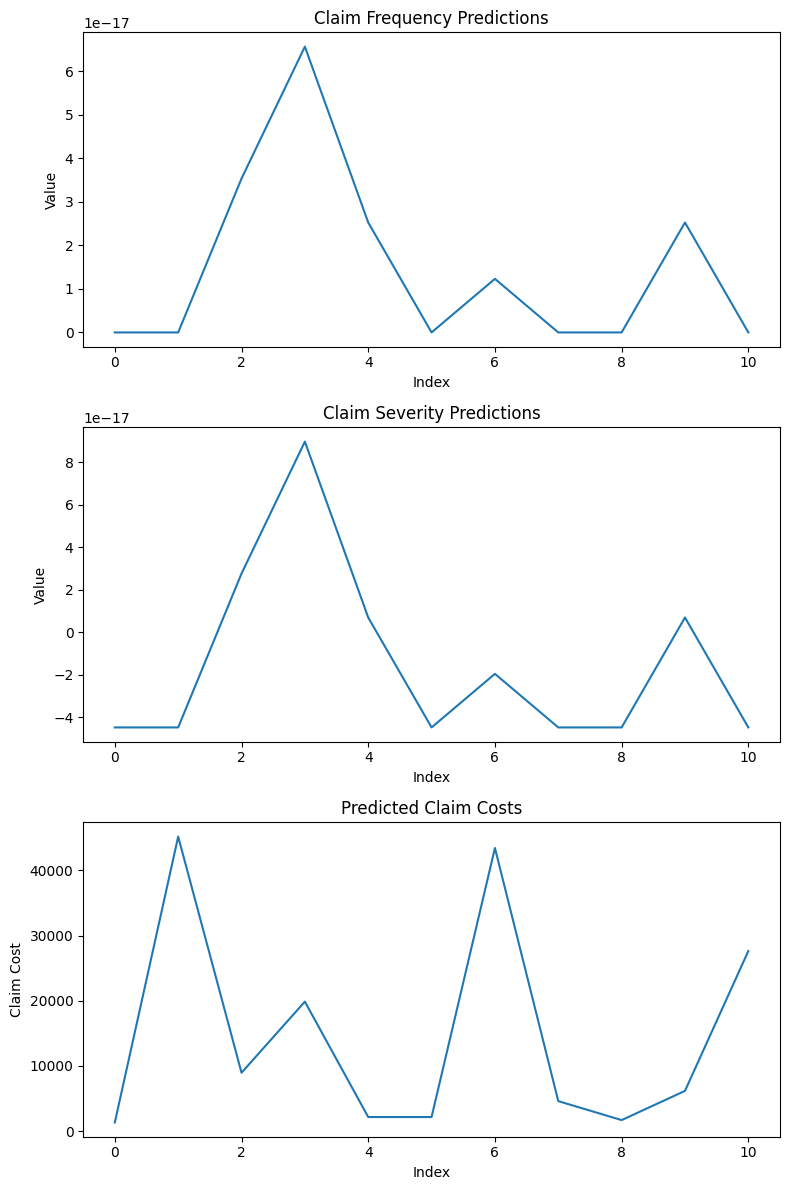

In [15]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot the expected claim frequencies
axes[0].plot(np.arange(len(predicted_claim_frequencies)), predicted_claim_frequencies)
axes[0].set_title("Claim Frequency Predictions")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")

# Plot the predicted claim severities
axes[1].plot(np.arange(len(predicted_claim_severities)), predicted_claim_severities)
axes[1].set_title("Claim Severity Predictions")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Value")


# Create the x-axis values
x_values = np.arange(len(predicted_claim_costs[0]))

# Create a line plot for the predicted claim costs
plt.plot(x_values, predicted_claim_costs[0])

# Set the title and labels for the plot
plt.title("Predicted Claim Costs")
plt.xlabel("Index")
plt.ylabel("Claim Cost")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

